In [1]:
from keras.models import Sequential
from keras.utils import Sequence, to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
path_train = r'/media/maurizio/DATA/Dropbox/Deep Learning/illimity/catpcha/data/char-1-epoch-10000/train'

In [3]:
path_test = r'/media/maurizio/DATA/Dropbox/Deep Learning/illimity/catpcha/data/char-1-epoch-10000/test'

## reorganizing dataset for fit_generator in class subfolders 
(just to it once in order to rearrange images from original train/test folders)

In [24]:
dirs = 'abcdefghijklmnopqrstuvyxwz'
for fold in dirs:
    os.makedirs(os.path.join(path_train,fold))
    os.makedirs(os.path.join(path_test,fold))

FileExistsError: [Errno 17] File exists: '/media/maurizio/DATA/Dropbox/Deep Learning/illimity/catpcha/data/char-1-epoch-10000/train/a'

In [68]:
filenames = [file for file in os.listdir(path_test) if len(file)>1]

In [69]:
filenames

['a_00345c08-d2bf-486c-b865-fd5bb257cb9a.png',
 'a_003cdb85-eca3-4fa9-b8f9-7e9fc3328391.png',
 'a_006d2a79-0123-41ce-b98b-0c2f2dfac46f.png',
 'a_00746f99-38d2-44ab-a429-bfe7869e81d5.png',
 'a_00ec3cd8-2db7-4efa-9d21-12d2afcad406.png',
 'a_00fc2c26-02a0-4878-aa47-9d1729a73a57.png',
 'a_0107a7aa-f204-4ef8-b59a-00131a866ccf.png',
 'a_0128872e-e475-42dd-b469-4d69cdb55dc1.png',
 'a_014c9846-68b3-4ee0-b34a-38362ebe79b6.png',
 'a_01c68ce8-cb35-4f30-ba50-4edd9a1a4526.png',
 'a_01db7bf8-2cca-4b8e-9d0a-cac9b5a9f13d.png',
 'a_021bb1b4-26ec-4370-a424-ef8488b434cd.png',
 'a_023a0b99-1d39-4ac2-9dd4-51ea8851d51e.png',
 'a_02518d2c-5f11-499d-9933-01a16374cece.png',
 'a_02549d9a-6a88-46e6-ac5b-4f9d12c19eeb.png',
 'a_0264ba4a-ee58-4eef-a26a-de42f1f48eb4.png',
 'a_02e91aa0-96da-4a97-9bd2-0c93ea4d647e.png',
 'a_035007f5-50d7-4b41-be7d-5df51a9280c0.png',
 'a_035788a1-b8b8-4428-91d0-04ed3584ae21.png',
 'l_b2082ed9-02b2-49f1-8f5d-2c7404991e6c.png',
 'l_b20c011e-0792-481b-9dfa-fbd2d969694f.png',
 'l_b20c90fd-

In [70]:
for file in filenames:
    os.rename(os.path.join(path_test,file),os.path.join(os.path.join(path_test,file[0]), file))

## ConvNet creation 

In [4]:
model= Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,60,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 58, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 5, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 3, 128)         147584    
__________

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255)

In [7]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(path_train, target_size=(100,60), batch_size=32, class_mode='categorical')

Found 260000 images belonging to 26 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(path_test, target_size=(100,60), batch_size=32, class_mode='categorical')

Found 52000 images belonging to 26 classes.


In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=260000 // 32, 
                              epochs=10, 
                              validation_data=test_generator, 
                              validation_steps=52000//32,
                              verbose=2
                             )

Epoch 1/10
166s - loss: 0.2333 - acc: 0.9291 - val_loss: 0.0073 - val_acc: 0.9982
Epoch 2/10
166s - loss: 0.0249 - acc: 0.9929 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 3/10
163s - loss: 0.0198 - acc: 0.9948 - val_loss: 0.0047 - val_acc: 0.9989
Epoch 4/10
166s - loss: 0.0187 - acc: 0.9953 - val_loss: 0.0048 - val_acc: 0.9986
Epoch 5/10


KeyboardInterrupt: 

In [11]:
model.save_weights('model.weights')

In [58]:
guessletter = 'h'
guessindex=995
myfile = os.listdir(path_test+'/'+guessletter)[guessindex]

In [59]:
myfile

'h_9cfc1724-8003-4424-9ef7-70bb7292f176.png'

In [60]:
mycheck = plt.imread(os.path.join(path_test+'/'+guessletter,myfile))

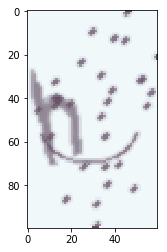

In [61]:
plt.imshow(mycheck)

In [62]:
mycheck = mycheck.reshape(1,100,60,3)

In [63]:
alphabet = 'abcdefghijklmnopqrstuvyxwz'
classes_ = {}
for i,class_ in enumerate(alphabet):
    classes_[i] = class_

In [64]:
print(classes_[model.predict_classes([mycheck], verbose=0)[0]])

h
